## Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## TidyCensus Example

This notebook grabs data from the US Census using the [tidycensus package in R](https://walker-data.com/tidycensus/index.html). Make sure you have installed the `tidyverse` and `tidycensus` packages.

In [ ]:
%%R 

install.packages("tidyverse")

In [5]:
%%R 

install.packages("tidycensus")


--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) 

Selection:  64


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package â€˜proxyâ€™ ...
** package â€˜proxyâ€™ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: â€˜Apple clang version 14.0.0 (clang-1400.0.29.202)â€™
using SDK: â€˜MacOSX13.1.sdkâ€™


clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c apply.c -o apply.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c arrayIndex.c -o arrayIndex.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c distance.c -o distance.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c dll.c -o dll.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/includ

distance.c:429:2: warning: add explicit braces to avoid dangling else [-Wdangling-else]
        else
        ^
distance.c:476:2: warning: add explicit braces to avoid dangling else [-Wdangling-else]
        else
        ^
2 warnings generated.
ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-proxy/00new/proxy/libs
** R
** inst
** byte-compile and prepare package for lazy loading


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (proxy)
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package â€˜wkâ€™ ...
** package â€˜wkâ€™ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: â€˜Apple clang version 14.0.0 (clang-1400.0.29.202)â€™
using C++ compiler: â€˜Apple clang version 14.0.0 (clang-1400.0.29.202)â€™
using SDK: â€˜MacOSX13.1.sdkâ€™


clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -I../inst/include/  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c bbox-handler.c -o bbox-handler.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -I../inst/include/  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c count-handler.c -o count-handler.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -I../inst/include/  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c debug-filter.c -o debug-filter.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -I../inst/include/  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homeb

ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-wk/00new/wk/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package can be loaded from temporary location


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (wk)
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package â€˜unitsâ€™ ...
** package â€˜unitsâ€™ successfully unpacked and MD5 sums checked
** using staged installation


configure: units: 0.8-5
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C++... yes
checking whether clang++ -std=gnu++17 accepts -g... yes
checking for clang++ -std=gnu++17 option to enable C++11 features... none needed
checking for stdio.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for strings.h... yes
checking for sys/stat.h... yes
checking for sys/types.h... yes
checking for unistd.h... yes
checking for _Bool... no
checking for stdbool.h that conforms to C99... yes
checking for error_at_line... no
checking for gcc... clang
checking whether the compiler supports GNU C... yes
checking whether clang accepts -g... yes
checking for clang option to enable C11 features... none

configure: error: in `/private/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T/Rtmpy5Qv4F/R.INSTALL66ec6ef2c250/units':
configure: error: 
--------------------------------------------------------------------------------
  Configuration failed because libudunits2.so was not found. Try installing:
    * deb: libudunits2-dev (Debian, Ubuntu, ...)
    * rpm: udunits2-devel (Fedora, EPEL, ...)
    * brew: udunits (OSX)
  If udunits2 is already installed in a non-standard location, use:
    --configure-args='--with-udunits2-lib=/usr/local/lib'
  if the library was not found, and/or:
    --configure-args='--with-udunits2-include=/usr/include/udunits2'
  if the header was not found, replacing paths with appropriate values.
  You can alternatively set UDUNITS2_INCLUDE and UDUNITS2_LIBS manually.
--------------------------------------------------------------------------------

See `config.log' for more details
ERROR: configuration failed for package â€˜unitsâ€™
* removing â€˜/opt/homebrew/lib/R/

clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c Rsvm.c -o Rsvm.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c cmeans.c -o cmeans.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c cshell.c -o cshell.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c floyd.c -o floyd.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBU

ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-e1071/00new/e1071/libs
** R
** inst
** byte-compile and prepare package for lazy loading


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** installing vignettes
** testing if installed package can be loaded from temporary location


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (e1071)
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package â€˜s2â€™ ...
** package â€˜s2â€™ successfully unpacked and MD5 sums checked
** using staged installation


Homebrew 4.4.19
Testing compiler using PKG_CFLAGS=-I/opt/homebrew/opt/openssl/include -I/opt/homebrew/opt/openssl@1.1/include


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
** libs
using C compiler: â€˜Apple clang version 14.0.0 (clang-1400.0.29.202)â€™
using C++ compiler: â€˜Apple clang version 14.0.0 (clang-1400.0.29.202)â€™
using C++14
using SDK: â€˜MacOSX13.1.sdkâ€™


Using PKG_LIBS=-L/opt/homebrew/opt/openssl/lib -L/opt/homebrew/opt/openssl@1.1/lib -lssl.3 -lcrypto.3
Using PKG_CFLAGS=-I/opt/homebrew/opt/openssl/include -I/opt/homebrew/opt/openssl@1.1/include -DOPENSSL_SUPPRESS_DEPRECATED -DIS_LITTLE_ENDIAN
clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -I../src -DSTRICT_R_HEADERS -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.4/site-library/wk/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -I/opt/homebrew/opt/openssl/include -I/opt/homebrew/opt/openssl@1.1/include -DOPENSSL_SUPPRESS_DEPRECATED -DIS_LITTLE_ENDIAN -pthread -fPIC  -g -O2   -c absl/base/internal/cycleclock.cc -o absl/base/internal/cycleclock.o
clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG -I../src -DSTRICT_R_HEADERS -I'/opt/homebrew/lib/R/4.4/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.4/site

ld: warning: directory not found for option '-L/opt/homebrew/opt/openssl@1.1/lib'
ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-s2/00new/s2/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** testing if installed package keeps a record of temporary installation path
* DONE (s2)
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package â€˜classIntâ€™ ...
** package â€˜classIntâ€™ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: â€˜Apple clang version 14.0.0 (clang-1400.0.29.202)â€™
using Fortran compiler: â€˜GNU Fortran (Homebrew GCC 14.2.0_1) 14.2.0â€™
using SDK: â€˜MacOSX13.1.sdkâ€™


/opt/homebrew/opt/gcc/bin/gfortran  -fPIC  -g -O2  -c fish1.f -o fish1.o
clang -I"/opt/homebrew/Cellar/r/4.4.2_2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c init.c -o init.o
clang -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -L/opt/homebrew/Cellar/r/4.4.2_2/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib -L/opt/homebrew/lib -o classInt.so fish1.o init.o -L/opt/homebrew/opt/gcc/lib/gcc/current/gcc/aarch64-apple-darwin21/14 -L/opt/homebrew/opt/gcc/lib/gcc/current/gcc -L/opt/homebrew/opt/gcc/lib/gcc/current -lemutls_w -lheapt_w -lgfortran -lquadmath -L/opt/homebrew/Cellar/r/4.4.2_2/lib/R/lib -lR -lintl -Wl,-framework -Wl,CoreFoundation


ld: warning: -undefined dynamic_lookup may not work with chained fixups
ld: warning: could not create compact unwind for _fish_: registers 27 and 28 not saved contiguously in frame
ld: warning: could not create compact unwind for ___emutls_get_address: does not use standard frame
ld: warning: could not create compact unwind for _allocate_tramp_ctrl: does not use standard frame
ld: warning: could not create compact unwind for ___gcc_nested_func_ptr_created: does not use standard frame
ld: warning: could not create compact unwind for ___gcc_nested_func_ptr_deleted: does not use standard frame
installing to /opt/homebrew/lib/R/4.4/site-library/00LOCK-classInt/00new/classInt/libs
** R
** inst
** byte-compile and prepare package for lazy loading


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (classInt)
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
ERROR: dependency â€˜unitsâ€™ is not available for package â€˜sfâ€™
* removing â€˜/opt/homebrew/lib/R/4.4/site-library/sfâ€™
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
ERROR: dependency â€˜sfâ€™ is not available for package â€˜tigrisâ€™
* removing â€˜/opt/homebrew/lib/R/4.4/site-library/tigrisâ€™
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
ERROR: dependencies â€˜sfâ€™, â€˜tigrisâ€™, â

Installing package into â€˜/opt/homebrew/lib/R/4.4/site-libraryâ€™
(as â€˜libâ€™ is unspecified)
also installing the dependencies â€˜proxyâ€™, â€˜e1071â€™, â€˜wkâ€™, â€˜classIntâ€™, â€˜s2â€™, â€˜sfâ€™, â€˜tigrisâ€™, â€˜unitsâ€™

trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/proxy_0.4-27.tar.gz'
Content type 'application/x-gzip' length 74622 bytes (72 KB)
downloaded 72 KB

trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/e1071_1.7-16.tar.gz'
Content type 'application/x-gzip' length 326734 bytes (319 KB)
downloaded 319 KB

trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/wk_0.9.4.tar.gz'
Content type 'application/x-gzip' length 1041219 bytes (1016 KB)
downloaded 1016 KB

trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/classInt_0.4-11.tar.gz'
Content type 'application/x-gzip' length 440406 bytes (430 KB)
downloaded 430 KB

trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/s2_1.1.7.tar.gz'
Content type 'application/x-gzip' length 23

In [9]:
%%R 

library(tidycensus)
library(tidyverse)

# store any shapefiles we grab from the census in ~/Library/Caches/tigris
# in case the government removes the shapefiles FTP server again ðŸ˜­
options(tigris_use_cache = TRUE)

Error in library(tidycensus) : there is no package called â€˜tidycensusâ€™


RInterpreterError: Failed to parse and evaluate line '\nlibrary(tidycensus)\nlibrary(tidyverse)\n\n# store any shapefiles we grab from the census in ~/Library/Caches/tigris\n# in case the government removes the shapefiles FTP server again ðŸ˜­\noptions(tigris_use_cache = TRUE)\n'.
R error message: 'Error in library(tidycensus) : there is no package called â€˜tidycensusâ€™'

### Step 1 \| Get a Census API key

Get a Census API key [here](https://api.census.gov/data/key_signup.html).

Then make a new file called `.env` in this folder and put it in there. 

The `.env` file should look like this:

```bash
CENSUS_API_KEY="your-api-key-here"
```

This is what is known as an environment variable. We load it below in Python

In [4]:
from dotenv import load_dotenv
load_dotenv() # <- searches for a file named .env and loads the environment variables in it

False

In [5]:
%%R 
# passes the CENSUS_API_KEY environment variable we loaded
# in Python above to R (specifically to the tidycensus package)
census_api_key(Sys.getenv("CENSUS_API_KEY"))

To install your API key for use in future sessions, run this function with `install = TRUE`.


### Step 2 \| Figure out what tables you want data from and at what geographic granularity

Use <https://censusreporter.org/> to figure out which tables you want.

-   Scroll to the bottom of the page to see the tables.
-   If you already know the table ID, stick that in the "Explore" section to learn more about that table.

Once you've found the variable or variables you want, you can plug them into this code under `variables`. 

In [6]:
%%R 

# the variable B01003_001 was selectd from the census table 
# for population, which we found in censusreporter here:
# https://censusreporter.org/tables/B01003/


# Here are the various geographies you can use with tidycensus
# https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus

# Get variable from ACS
nyc_census_data <- get_acs(geography = "tract", 
                      state='NY',
                      county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
                      variables = c(
                        population="B01003_001",
                        total_units = "B25001_001",
                        med_inc="B19013_001"
                      ), 
                      year = 2021,
                      survey="acs5",
                      geometry=T)

nyc_census_data


Simple feature collection with 6981 features and 5 fields (with 3 geometries empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
First 10 features:
         GEOID                                       NAME    variable estimate
1  36081014700  Census Tract 147, Queens County, New York  population     2863
2  36081014700  Census Tract 147, Queens County, New York     med_inc    71815
3  36081014700  Census Tract 147, Queens County, New York total_units     1570
4  36047058400   Census Tract 584, Kings County, New York  population     3655
5  36047058400   Census Tract 584, Kings County, New York     med_inc    67315
6  36047058400   Census Tract 584, Kings County, New York total_units     1498
7  36061006900 Census Tract 69, New York County, New York  population     2450
8  36061006900 Census Tract 69, New York County, New York     med_inc   237500
9  36061006900 Census Tract 69, New York Co

Getting data from the 2017-2021 5-year ACS
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'


### Step 3 | Pivot to Wide Format

Pivot from long to wide using `pivot_wider`.

Depending on what you're trying to do, you may want the data in long or wide format. This example pivots the data to wide format, which will help us with mapping later on in the notebook.

In [7]:
%%R 

nyc_census_data <- nyc_census_data %>% 
  pivot_wider(
    names_from=variable, 
    values_from = c(estimate, moe),
    names_glue = "{variable}_{.value}"
  )# pivot from wide to long

nyc_census_data

Simple feature collection with 2327 features and 8 fields (with 1 geometry empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 2,327 Ã— 9
   GEOID    NAME                   geometry population_estimate med_inc_estimate
   <chr>    <chr>        <MULTIPOLYGON [Â°]>               <dbl>            <dbl>
 1 3608101â€¦ Censâ€¦ (((-73.9137 40.76548, -7â€¦                2863            71815
 2 3604705â€¦ Censâ€¦ (((-73.96103 40.59616, -â€¦                3655            67315
 3 3606100â€¦ Censâ€¦ (((-74.02064 40.73039, -â€¦                2450           237500
 4 3604707â€¦ Censâ€¦ (((-73.93345 40.6257, -7â€¦                2676           117857
 5 3604710â€¦ Censâ€¦ (((-73.90735 40.63083, -â€¦                3004            76207
 6 3604705â€¦ Censâ€¦ (((-73.96279 40.72256, -â€¦                1834           107410
 7 3600502â€¦ Censâ€¦ (((-73.92012 40.83759, -â€¦                40

### Step 4 | Do calculations with `mutate`

In R, you can use `mutate` to create new columns or modify existing ones.

In this example, we create a column called `borough` by extracting the borough from the `NAME` column.

_(hint, I used GitHub Copilot -- a tool similar to ChatGPT -- to do this...see my prompt in the comments)_

In [8]:
%%R 

# Extract borough name from NAME by splitting strings like "Census Tract 147, Queens County, New York" 
# on commas and extracting the second to last element

nyc_census_data <- nyc_census_data %>% 
    mutate(
        borough = str_split(NAME, ",") %>% map_chr(2) %>% str_trim(),
        units_per_person = total_units_estimate / population_estimate
    ) 

nyc_census_data

Simple feature collection with 2327 features and 10 fields (with 1 geometry empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 2,327 Ã— 11
   GEOID    NAME                   geometry population_estimate med_inc_estimate
 * <chr>    <chr>        <MULTIPOLYGON [Â°]>               <dbl>            <dbl>
 1 3608101â€¦ Censâ€¦ (((-73.9137 40.76548, -7â€¦                2863            71815
 2 3604705â€¦ Censâ€¦ (((-73.96103 40.59616, -â€¦                3655            67315
 3 3606100â€¦ Censâ€¦ (((-74.02064 40.73039, -â€¦                2450           237500
 4 3604707â€¦ Censâ€¦ (((-73.93345 40.6257, -7â€¦                2676           117857
 5 3604710â€¦ Censâ€¦ (((-73.90735 40.63083, -â€¦                3004            76207
 6 3604705â€¦ Censâ€¦ (((-73.96279 40.72256, -â€¦                1834           107410
 7 3600502â€¦ Censâ€¦ (((-73.92012 40.83759, -â€¦                

### Step 5 | Example Plots

Let's practice with histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 88 rows containing non-finite outside the scale range (`stat_bin()`). 



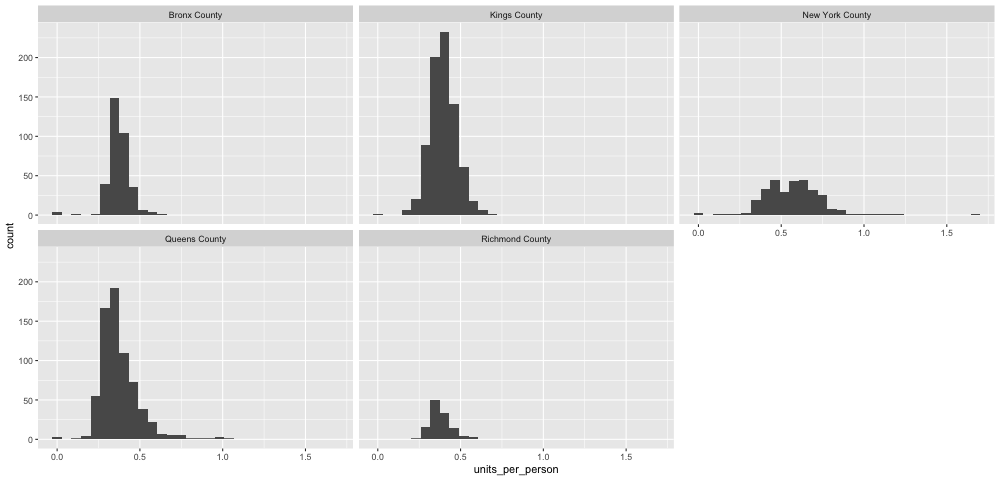

In [9]:
%%R -w 1000

ggplot(nyc_census_data) + 
    aes(x=units_per_person) +
    geom_histogram() + 
    facet_wrap(~borough) 

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 88 rows containing non-finite outside the scale range
(`stat_boxplot()`). 

R[write to console]: 2: Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`). 



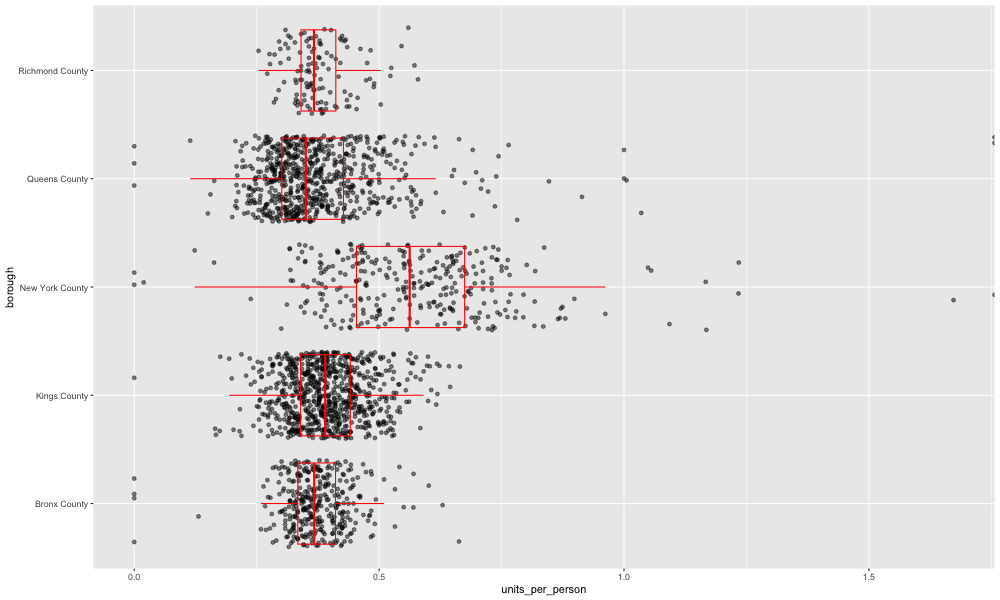

In [10]:
%%R -w 1000 -h 600

ggplot(nyc_census_data) + 
    aes(x=units_per_person, y=borough) +
    geom_jitter(alpha=0.5) + 
    # overlay a box and whisker plot that is transparent with no outliers and is red
    geom_boxplot(fill=NA, outlier.shape=NA, color="red") 

### Step 6 \| Example Map

See more details about making maps here:

https://walker-data.com/tidycensus/articles/spatial-data.html

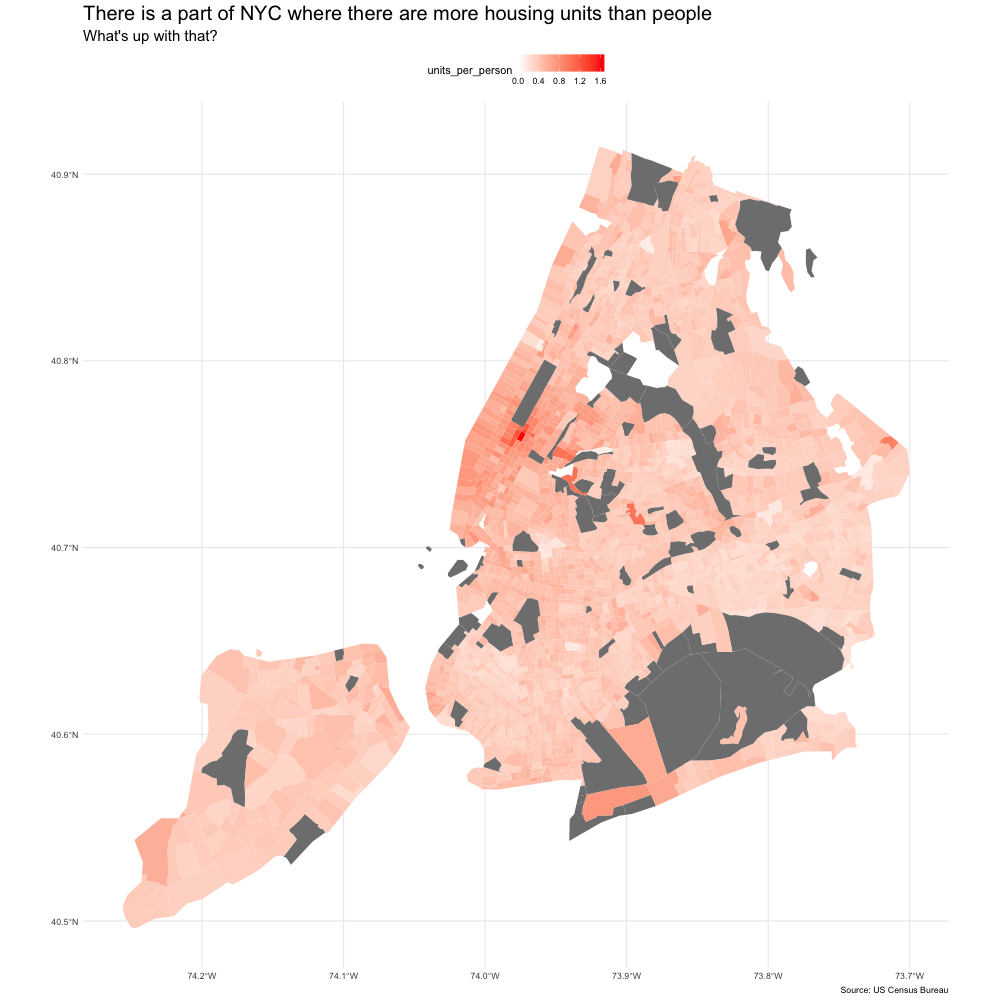

In [11]:
%%R -w 1000 -h 1000

nyc_census_data %>%
  ggplot(aes(fill = units_per_person)) + 
  geom_sf(color = NA) + 
  scale_fill_gradient(low="white", high="red") + 
  theme_minimal() +
  labs(
    title = "There is a part of NYC where there are more housing units than people",
    subtitle = "What's up with that?",
    caption = "Source: US Census Bureau"
  ) +
  theme(
    #make title and subitle bigger
    plot.title = element_text(size = 20),
    plot.subtitle = element_text(size = 15),
    # move legend to top
    legend.position = "top"
  )


## Bonus ðŸ¤”

Hmm...that map looks weird. What happened to the east river (the one that separates Queens from Manhattan). How can we fix it? Google around and see if you can find a tutorial to help you figure out the problem and fix it. Then, correct the mistake in the map above.

In [13]:
# What terms did you search for to find the answer? Link to the source of the answer (or the chatbot conversation) here:

# ðŸ‘‰